In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score

In [ ]:
path = r'/content/drive/MyDrive/Hackathon/Hackathon_2021/FinalHackathonData/train/train.csv'
csv = pd.read_csv(path,index_col = False)
csv

,ID,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35
0,0,130.81,k,v,at,a,d,u,j,o,0.207113,0.102098,0.111004,0.216615,0.146331,0.028388,0.185711,0.777778,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,6,88.53,k,t,av,e,d,y,l,o,0.504978,0.017506,0.619889,0.894729,0.551012,0.592542,0.030913,0.777778,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,7,76.26,az,w,n,c,d,x,j,x,0.392335,0.003765,0.664662,0.838358,0.568761,0.666060,0.028821,0.777778,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
3,9,80.62,az,t,n,f,d,x,l,e,0.474729,0.008185,0.398554,0.939653,0.519872,0.657140,0.034897,0.333333,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
4,13,78.02,az,v,n,f,d,h,d,n,0.101880,0.005490,0.336053,0.254513,0.183256,0.082675,0.148385,0.111111,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0.173187,0.047359,0.434083,0.246760,0.303900,0.095729,0.082174,0.444444,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4205,8406,108.77,j,o,t,d,d,aa,h,h,0.677003,0.050008,0.725625,0.940801,0.618187,0.555785,0.023613,0.444444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0.246478,0.050887,0.376189,0.341534,0.203936,0.080124,0.132420,0.111111,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4207,8415,87.48,al,r,e,f,d,aa,l,u,0.140174,0.016167,0.228695,0.277885,0.219941,0.091509,0.121772,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#csv.columns = csv.iloc[2]
#csv

In [ ]:
#csv_new = csv.drop([0,1,2],axis = 0)
#csv_new.reset_index(drop= True)

In [ ]:
cols=csv_new.select_dtypes(exclude='int').columns.to_list()
convert_dict = {'y':float,
                'X9':float,'X10':float,'X11':float,'X12':float,
                'X13':float,'X14':float,'X15':float,'X16':float}
csv_final = csv_new.astype(convert_dict)

In [ ]:
#csv_final = csv_new.set_index('ID')
#csv_final_label = csv_final['y']

In [ ]:
csv_final = csv.set_index('ID')

In [ ]:
csv_final

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0.207113,0.102098,0.111004,0.216615,0.146331,0.028388,0.185711,0.777778,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6,88.53,k,t,av,e,d,y,l,o,0.504978,0.017506,0.619889,0.894729,0.551012,0.592542,0.030913,0.777778,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
7,76.26,az,w,n,c,d,x,j,x,0.392335,0.003765,0.664662,0.838358,0.568761,0.666060,0.028821,0.777778,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
9,80.62,az,t,n,f,d,x,l,e,0.474729,0.008185,0.398554,0.939653,0.519872,0.657140,0.034897,0.333333,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
13,78.02,az,v,n,f,d,h,d,n,0.101880,0.005490,0.336053,0.254513,0.183256,0.082675,0.148385,0.111111,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,107.39,ak,s,as,c,d,aa,d,q,0.173187,0.047359,0.434083,0.246760,0.303900,0.095729,0.082174,0.444444,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8406,108.77,j,o,t,d,d,aa,h,h,0.677003,0.050008,0.725625,0.940801,0.618187,0.555785,0.023613,0.444444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8412,109.22,ak,v,r,a,d,aa,g,e,0.246478,0.050887,0.376189,0.341534,0.203936,0.080124,0.132420,0.111111,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
csv_final.describe()

,y,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.363062,0.038184,0.451251,0.556676,0.422482,0.312237,0.075241,0.499089,0.007603,0.007840,0.099549,0.142789,0.002613,0.086957,0.020670,0.001901,0.004989,0.682585,0.032549,0.043003,0.004514,0.232359,0.011167,0.000238,0.005464,0.232359,0.431694
std,12.679381,0.197899,0.027822,0.174227,0.280378,0.187133,0.209213,0.068673,0.320024,0.086872,0.088208,0.299433,0.349899,0.051061,0.281805,0.142294,0.043561,0.070467,0.465526,0.177475,0.202888,0.067043,0.422387,0.105093,0.015414,0.073729,0.422387,0.495371
min,72.110000,0.013046,0.000000,0.010449,0.032720,0.000964,0.000000,0.000524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.181367,0.020536,0.333660,0.288521,0.229047,0.083972,0.029632,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.327758,0.032905,0.448082,0.512022,0.503348,0.315718,0.037174,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.533974,0.050476,0.594020,0.883729,0.561731,0.503135,0.116275,0.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,265.320000,1.000000,1.000000,1.000000,1.000000,0.985942,1.000000,0.976005,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


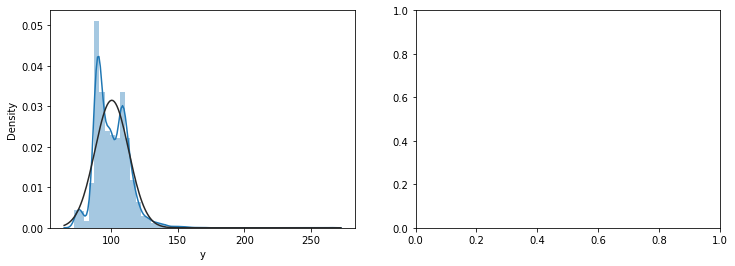

In [ ]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.distplot(csv_final['y'], ax=ax[0], fit=norm)

In [ ]:
y = csv_final['y']
X = csv_final.drop('y',axis=1)

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,k,v,at,a,d,u,j,o,0.207113,0.102098,0.111004,0.216615,0.146331,0.028388,0.185711,0.777778,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6,k,t,av,e,d,y,l,o,0.504978,0.017506,0.619889,0.894729,0.551012,0.592542,0.030913,0.777778,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
7,az,w,n,c,d,x,j,x,0.392335,0.003765,0.664662,0.838358,0.568761,0.666060,0.028821,0.777778,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
9,az,t,n,f,d,x,l,e,0.474729,0.008185,0.398554,0.939653,0.519872,0.657140,0.034897,0.333333,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
13,az,v,n,f,d,h,d,n,0.101880,0.005490,0.336053,0.254513,0.183256,0.082675,0.148385,0.111111,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,ak,s,as,c,d,aa,d,q,0.173187,0.047359,0.434083,0.246760,0.303900,0.095729,0.082174,0.444444,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8406,j,o,t,d,d,aa,h,h,0.677003,0.050008,0.725625,0.940801,0.618187,0.555785,0.023613,0.444444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8412,ak,v,r,a,d,aa,g,e,0.246478,0.050887,0.376189,0.341534,0.203936,0.080124,0.132420,0.111111,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df_train = pd.get_dummies(X,columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7','X8'])

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [ ]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [ ]:
cols=df_train.select_dtypes(exclude='int').columns.to_list()
df_train[cols] = df_train[cols].astype('float')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df_train, y, test_size=0.2, random_state=42)

In [ ]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 1	valid_0's l2: 152.53	valid_0's l1: 10.0406
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's auc: 1	valid_0's l2: 149.466	valid_0's l1: 9.93972
[3]	valid_0's auc: 1	valid_0's l2: 146.461	valid_0's l1: 9.83977
[4]	valid_0's auc: 1	valid_0's l2: 143.528	valid_0's l1: 9.74102
[5]	valid_0's auc: 1	valid_0's l2: 140.647	valid_0's l1: 9.64317
[6]	valid_0's auc: 1	valid_0's l2: 137.829	valid_0's l1: 9.54634
[7]	valid_0's auc: 1	valid_0's l2: 135.068	valid_0's l1: 9.45058
[8]	valid_0's auc: 1	valid_0's l2: 132.355	valid_0's l1: 9.35557
[9]	valid_0's auc: 1	valid_0's l2: 129.705	valid_0's l1: 9.26177
[10]	valid_0's auc: 1	valid_0's l2: 127.111	valid_0's l1: 9.16897
[11]	valid_0's auc: 1	valid_0's l2: 124.555	valid_0's l1: 9.07689
[12]	valid_0's auc: 1	valid_0's l2: 122.05	valid_0's l1: 8.98572
[13]	valid_0's auc: 1	valid_0's l2: 119.593	valid_0's l1: 8.89541
[14]	valid_0's auc: 1	valid_0's l2: 117.185	valid_0's l1: 8.80601
[15]	valid_0's auc: 1	v

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.01, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_test) ** 0.5, 5), 'R2 error:',r2_score(y_test,y_pred))

The rmse of prediction is: 0.11913 R2 error: 0.02004609589376183


In [ ]:
y_pred

array([100.56763099, 100.57827897, 100.60428342, ..., 100.60150854,
       100.59902785, 100.55552629])

In [ ]:
y_train

ID
2011     88.96
3690     89.90
7597     92.59
322     108.84
3103    111.15
         ...  
6879    109.42
898      78.25
6214     92.18
7558     91.92
1712     87.71
Name: y, Length: 3367, dtype: float64

In [ ]:
r = pd.Series()